# 소개

**EDA(Exploratory Data Analysis)** 란 결측치 및 이상치를 탐지하여 **전처리 방향을 결정**하고,
통계 요약 및 시각화를 통해 데이터의 분포, 변수 간 관계 등 **핵심 특성을 파악하는 과정**이다.

# 데이터 분석 절차 및 고려사항

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import koreanize_matplotlib
import folium
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

* 데이터 불러오는 함수: `pd.read_csv()`, `pd.read_excel()`, `pd.read_spss()` 
* 만날 수 있는 에러: `FileNotFoundError` , `UnicodeDecodeError`, `ModuleNotFoundError`

In [2]:
# 전국 소방청 관할 소방서 현황 Load

main_df = pd.read_csv("data/소방청_시도 소방서 현황_20240630.csv", encoding = "CP949")

## 2. 데이터 정보 확인

* 데이터 속성: `data.columns`, `data.shape`
* 데이터 전체 정보: `data.info()`
* 데이터 형 변환: `data.astype()`, `pd.to_datetime()`
* 범주형 변수 카테고리 조회: `data.unique()`, `data.describe()`
* 연속형 변수 요약: `data.describe()`



In [3]:
# main_pd 정보 확인

print(main_df.info())
print(main_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순번      241 non-null    int64 
 1   본부명     241 non-null    object
 2   소방서     241 non-null    object
 3   주소      241 non-null    object
 4   전화번호    241 non-null    object
 5   FAX     237 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.4+ KB
None
   순번       본부명    소방서                          주소          전화번호           FAX
0   1  서울소방재난본부  강남소방서    서울특별시 강남구 테헤란로 629 (삼성동)  02-6981-7408   02-556-2119
1   2  서울소방재난본부  강동소방서      서울특별시 강동구 성내로 39 (성내동)  02-6981-7600  02-6981-7717
2   3  서울소방재난본부  강북소방서      서울특별시 강북구 한천로 911 (번동)  02-6946-0100  02-6946-0128
3   4  서울소방재난본부  강서소방서     서울특별시 강서구 양천로 550 (등촌동)  02-6981-5000  02-2187-8243
4   5  서울소방재난본부  관악소방서      서울특별시 관악구 관악로 97 (봉천동)  02-6981-8200   02-877-4119
5   6  서울소방재난본부  광진소방서    서울특별시 광진구 광나루로 480 (구의동)  02-6981-6600  02-6981-6718

## 3. 결측치 처리

* 결측치 개수 파악: `data.isna()`, `data.isnull()`
* 결측치 처리: `data.fillna()`, `data.dropna(subset=[])`



In [4]:
# 결측치 확인

print(main_df.isna())
print(main_df.isna().sum(axis = 0))

        순번    본부명    소방서     주소   전화번호    FAX
0    False  False  False  False  False  False
1    False  False  False  False  False  False
2    False  False  False  False  False  False
3    False  False  False  False  False  False
4    False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...
236  False  False  False  False  False  False
237  False  False  False  False  False  False
238  False  False  False  False  False  False
239  False  False  False  False  False  False
240  False  False  False  False  False  False

[241 rows x 6 columns]
순번      0
본부명     0
소방서     0
주소      0
전화번호    0
FAX     4
dtype: int64


# 3.5. 필수 데이터만 추출 & 위치데이터 위도, 경도 데이터로 변환 (API 활용)

In [5]:
# 순번, 전화번호, Fax Column을 삭제

main_df.drop(labels = ["순번", "전화번호", "FAX"], inplace = True, axis =1)
print(main_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   본부명     241 non-null    object
 1   소방서     241 non-null    object
 2   주소      241 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB
None


In [6]:
# 주소정보를 좌표로 변환하는 공공 api 사용을 위한 api

import requests
apiurl = "https://api.vworld.kr/req/address?"
params = {
	"service": "address",
	"request": "getcoord",
	"crs": "epsg:4326",
	"address": "서울특별시 강남구 테헤란로 629 (삼성동)",
	"format": "json",
	"type": "road",
	"key": "BAF7AE6D-34DD-3FFC-8FBD-581B94C480F1"
}

In [7]:
# 응답 json 파일 포맷 확인

response = requests.get(apiurl, params = params)
print(response.json())

{'response': {'service': {'name': 'address', 'version': '2.0', 'operation': 'getcoord', 'time': '31(ms)'}, 'status': 'OK', 'input': {'type': 'road', 'address': '서울특별시 강남구 테헤란로 629 (삼성동)'}, 'refined': {'text': '서울특별시 강남구 테헤란로 629 (삼성동)', 'structure': {'level0': '대한민국', 'level1': '서울특별시', 'level2': '강남구', 'level3': '삼성동', 'level4L': '테헤란로', 'level4LC': '', 'level4A': '삼성1동', 'level4AC': '1168058000', 'level5': '629', 'detail': '강남소방서'}}, 'result': {'crs': 'EPSG:4326', 'point': {'x': '127.066833791', 'y': '37.510278466'}}}}


In [8]:
print(response.json())
print(params)
response.status_code

{'response': {'service': {'name': 'address', 'version': '2.0', 'operation': 'getcoord', 'time': '31(ms)'}, 'status': 'OK', 'input': {'type': 'road', 'address': '서울특별시 강남구 테헤란로 629 (삼성동)'}, 'refined': {'text': '서울특별시 강남구 테헤란로 629 (삼성동)', 'structure': {'level0': '대한민국', 'level1': '서울특별시', 'level2': '강남구', 'level3': '삼성동', 'level4L': '테헤란로', 'level4LC': '', 'level4A': '삼성1동', 'level4AC': '1168058000', 'level5': '629', 'detail': '강남소방서'}}, 'result': {'crs': 'EPSG:4326', 'point': {'x': '127.066833791', 'y': '37.510278466'}}}}
{'service': 'address', 'request': 'getcoord', 'crs': 'epsg:4326', 'address': '서울특별시 강남구 테헤란로 629 (삼성동)', 'format': 'json', 'type': 'road', 'key': 'BAF7AE6D-34DD-3FFC-8FBD-581B94C480F1'}


200

In [9]:
# 필요한 값 추출 테스트

print(response.json()['response']['result']['point']['x']) # 경도
print(response.json()['response']['result']['point']['y']) # 위도

127.066833791
37.510278466


In [57]:
lat_list = []
long_list = []


for address in main_df["주소"].tolist() :
    params["address"] = address
    response = requests.get(apiurl, params = params)

    # 응답값의 반환 값 중, 위도 경도 값을 추출
    if (response.status_code == 200) & (response.json()['response']['status'] != "NOT_FOUND") :
        # 응답 성공 시
        lat_value = response.json()['response']['result']['point']['y']
        long_value = response.json()['response']['result']['point']['x']
    
    else : 
        # 응답 실패 시
        print("error with" + address + " : " + response.json()['response']['status'])
        lat_value = None
        long_value = None
    
    # 추출한 값을 list에 저장
    lat_list.append(lat_value)
    long_list.append(long_value)


main_df["위도"] = lat_list
main_df["경도"] = long_list

print(main_df)


          본부명    소방서                         주소            위도             경도
0    서울소방재난본부  강남소방서   서울특별시 강남구 테헤란로 629 (삼성동)  37.510278466  127.066833791
1    서울소방재난본부  강동소방서     서울특별시 강동구 성내로 39 (성내동)  37.529286797  127.124955730
2    서울소방재난본부  강북소방서     서울특별시 강북구 한천로 911 (번동)  37.633079172  127.038150105
3    서울소방재난본부  강서소방서    서울특별시 강서구 양천로 550 (등촌동)  37.558166553  126.859891312
4    서울소방재난본부  관악소방서     서울특별시 관악구 관악로 97 (봉천동)  37.473640671  126.952507911
..        ...    ...                        ...           ...            ...
236    창원소방본부  동부소방서  제주 서귀포시 성산읍 일주동로 4120번길 7  33.460000863  126.909718256
237    제주소방본부  마산소방서    경상남도 창원시 마산합포구 제2부두로 55  35.198197441  128.574795176
238    제주소방본부  성산소방서       경상남도 창원시 성산구 상남로 165  35.227421610  128.685542481
239    제주소방본부  의창소방서    경상남도 창원시 의창구  중동중앙로 119  35.258593034  128.630974234
240    제주소방본부  진해소방서     경상남도 창원시 진해구 진해대로 1101  35.132872750  128.710631647

[241 rows x 5 columns]


## 4. 데이터 시각화 



In [39]:
# 지도 출력하기
center = [36.3, 128] # 중심 위치
map = folium.Map(location=center, zoom_start=7.5)
map

In [61]:
for i in range(len(main_df)):
    temp = main_df.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    popup_text = f"본부명 : {main_df['본부명'].values[i]} <br> 소방서명 : {main_df['소방서'].values[i]} <br> 주소 : {main_df['주소'].values[i]}"
    folium.Marker(location=[lat, lng], 
                  icon=folium.Icon(color="blue"), 
                  tooltip = main_df["소방서"].values[i],  
                  popup=folium.Popup(popup_text, max_width = 300)).add_to(map)
map

In [18]:
# 소방서 중 가장 동, 서, 남, 북에 있는 소방서들 10개씩

data_east = main_df.sort_values(by = ['경도'], axis = 0, ascending = False).head(10) 
print(data_east) # 동

data_west = main_df.sort_values(by = ['경도'], axis = 0, ascending = True).head(10)
print(data_west) # 서

data_north = main_df.sort_values(by = ['위도'], axis = 0, ascending = False).head(10)
print(data_north) # 남

data_south = main_df.sort_values(by = ['위도'], axis = 0, ascending = True).head(10)
print(data_south) # 북

        본부명      소방서                     주소            위도             경도
213  경북소방본부  포항남부소방서  경상북도 포항시 남구 동해안로 5890  35.993383371  129.418930873
69   울산소방본부    동부소방서      울산광역시 동구 꽃바위2가길 9  35.482334306  129.412584914
208  경북소방본부    울진소방서  경상북도 울진군 울진읍 울진북로 508  36.993423562  129.394605910
204  경북소방본부    영덕소방서  경상북도 영덕군 영덕읍 경동로 8401  36.416708294  129.371009752
70   울산소방본부    북부소방서       울산광역시 북구 화동로 178  35.606784521  129.370125979
214  경북소방본부  포항북부소방서    경상북도 포항시 북구 중앙로 332  36.042470108  129.366150127
67   울산소방본부    남부소방서         울산광역시 삼산중로 149  35.547254555  129.335251244
68   울산소방본부   남울주소방서      울산광역시 울주군 덕신로 232  35.433365035  129.306670686
72   울산소방본부    중부소방서       울산광역시 중구 종가로 205  35.562950802  129.299310421
195  경북소방본부    경주소방서      경상북도 경주시 알천남로 276  35.844068795  129.228419533
          본부명    소방서                      주소            위도             경도
193    전남소방본부  신안소방서     전라남도 신안군 암태면 승봉로 17  34.825508500  126.111937624
192    전남소방본부  진도소방서  전라남도 진도군 진도읍 진도대로 6935  34.

In [38]:
center = [36.3, 128] # 중심 위치
map = folium.Map(location=center, zoom_start=7.5)
map

In [40]:
for i in range(len(data_east)):
    temp = data_east.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    popup_text = f"본부명 : {data_east['본부명'].values[i]} <br> 소방서명 : {data_east['소방서'].values[i]} <br> 주소 : {data_east['주소'].values[i]}"
    folium.Marker(location=[lat, lng], 
                  icon=folium.Icon(color="red"), 
                  tooltip = data_east["소방서"].values[i],  
                  popup=folium.Popup(popup_text, max_width = 300)).add_to(map)
    
for i in range(len(data_west)):
    temp = data_west.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    popup_text = f"본부명 : {data_west['본부명'].values[i]} <br> 소방서명 : {data_west['소방서'].values[i]} <br> 주소 : {data_west['주소'].values[i]}"
    folium.Marker(location=[lat, lng], 
                  icon=folium.Icon(color="green"), 
                  tooltip = data_west["소방서"].values[i],  
                  popup=folium.Popup(popup_text, max_width = 300)).add_to(map)
    
for i in range(len(data_south)):
    temp = data_south.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    popup_text = f"본부명 : {data_south['본부명'].values[i]} <br> 소방서명 : {data_south['소방서'].values[i]} <br> 주소 : {data_south['주소'].values[i]}"
    folium.Marker(location=[lat, lng], 
                  icon=folium.Icon(color="purple"), 
                  tooltip = data_south["소방서"].values[i],  
                  popup=folium.Popup(popup_text, max_width = 300)).add_to(map)
    
for i in range(len(data_north)):
    temp = data_north.iloc[i]
    lat, lng = temp[["위도", "경도"]]

    popup_text = f"본부명 : {data_north['본부명'].values[i]} <br> 소방서명 : {data_north['소방서'].values[i]} <br> 주소 : {data_north['주소'].values[i]}"
    folium.Marker(location=[lat, lng], 
                  icon=folium.Icon(color="orange"), 
                  tooltip = data_north["소방서"].values[i],  
                  popup=folium.Popup(popup_text, max_width = 300)).add_to(map)
    
map

### 1) 변수 분포 파악

* 범주형/순서형/이산형: 막대그래프
* 연속형: 히스토그램, 상자그림
* 시계열: 선그래프
* 전처리가 필요한가? ex. 이상치 제거, 로그 변환 등



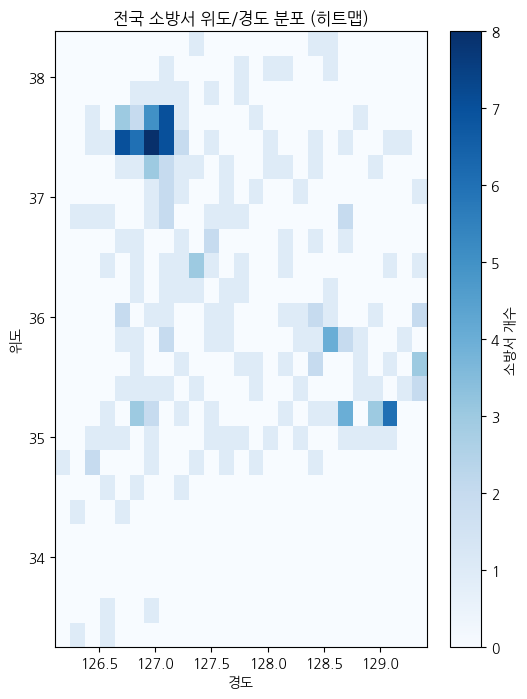

In [79]:
# 위도, 경도 분포 범 그래프

# 타입 변환
df_temp = main_df.dropna(subset = ["위도", "경도"]).copy()
df_temp["위도"] = df_temp["위도"].astype(float)
df_temp["경도"] = df_temp["경도"].astype(float)

plt.figure(figsize=(6, 8))
plt.hist2d(df_temp["경도"], df_temp["위도"], bins = 25, cmap = 'Blues')
plt.colorbar(label = '소방서 개수')
plt.xlabel("경도")
plt.ylabel("위도")
plt.title("전국 소방서 위도/경도 분포 (히트맵)")
plt.show()

### 2) 변수 관계 파악

* `data.groupby()`, `pd.pivot_table()`, `pd.crosstab()`
* 상관관계: `data.corr()`, `sns.pairplot()`, `sns.heatmap()`



## 7. 결론

* 어떤 전처리를 진행했나요?  
    &nbsp; 프로젝트 목적에 맞지 않는 Column 제거, 이후 api 요청에서 찾을 수 없는 주소값들 수정  
    &nbsp; 공공 api를 통한 도로명주소 -> 위도 경도 Column 추가  
        
- 데이터의 특징이 무엇인가요?  
    &nbsp; 서울, 수도권 지역에 소방서가 밀집되어 있다.  